# 线性回归

我们来分析一个案例，关于美国某个城市人口与其城市收入的问题，根据其提供的样本绘制散点图如下

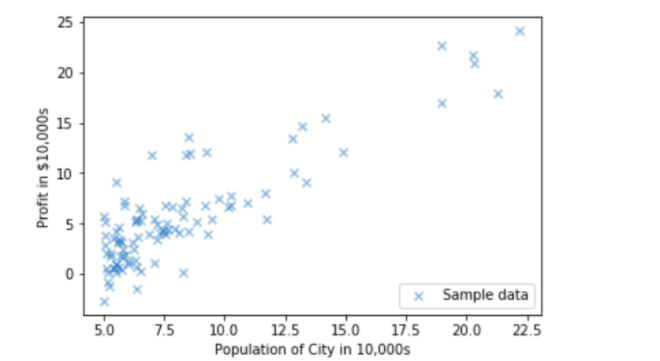

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset = pd.read_csv('cityprofit.csv')
# 提取csv文件

X = dataset.iloc[:, 0:1].values   # 所有行，第0列

Y = dataset.iloc[:, 1].values           # 所有行，第1列


In [14]:
# 数据集的拆分

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=1/4, random_state =0)



In [15]:
# 线性回归模型

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

"""
    LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):线性回归
        parameters：
            fit_intercept: 是否计算截距
            normalize:     是否规范化
            copy_x:        是否复制x
        Attributes:属性
            coef_:         系数 （线性回归方程的斜率）
            intercept_:    截距
        Methods:方法
            fit(X, y, sample_weight=None):   拟合 （这个很强大）
            get_params(deep=True):           得到参数,如果deep为True则得到这个estimator 的子对象返回参数名和值的映射
            set_params(**params):            设置参数
            predict(X):                      预测
            score(X, y, sample_weight=None): 预测的准确度。X：测试样本；y：X的真实结果；sample_w
            weight:                           权重
"""

regressor = regressor.fit(X_train, Y_train)

# fit要求x是一个二维数组 
# [:, 0 ]会自动处理为一维数组，所以要写为 [: , 0:1], [:, :1]

Y_pred = regressor.predict(X_test)


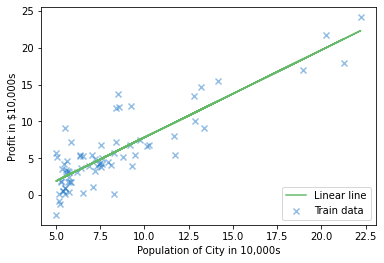

In [19]:
# 可视化

plt.scatter( X_train, Y_train, color = '#2177C7',marker='x', alpha=0.48)
plt.plot(X_train, regressor.predict(X_train),  color ='#66BB6A')
plt.legend(labels=["Linear line","Train data"],loc="lower right")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()


In [20]:
print("训练后结果")

print("斜率：%.2f"%float(regressor.coef_))
print("截距：%.2f"%float(regressor.intercept_))

训练后结果
斜率：1.19
截距：-4.05


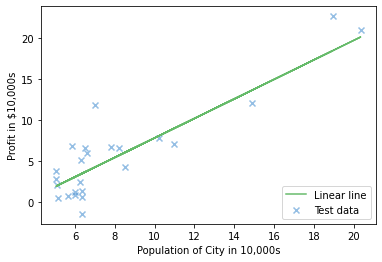

In [21]:
# 测试集的效果

plt.scatter(X_test , Y_test, color = '#2177C7',marker='x',alpha=0.48)
plt.plot(X_test , regressor.predict(X_test), color ='#66BB6A')
plt.legend(labels=["Linear line","Test data"],loc="lower right");
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

# KNN 算法

sepal_length 最大值：7.9
sepal_length 最小值：4.3
sepal_length 平均值：5.8
-------------------------------------
sepal_width 最大值：4.4
sepal_width 最小值：2.0
sepal_width 平均值：3.1
-------------------------------------
cm [[13  0  0]
 [ 0  9  7]
 [ 0  2  7]]


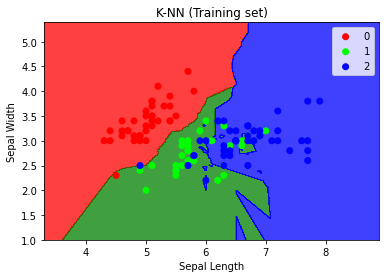

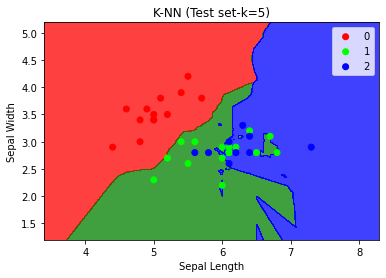

In [14]:
# K近邻算法

# 导入相关库文件

import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
from sklearn import neighbors, datasets
    # 导入了很多经典的数据集



# 导入数据集，数据集sklearn自带，X与y一一对应
dataset = datasets.load_iris()
    # 获取鸢尾花前两列花萼长度和花萼宽度（sepal_length、sepal_width）数据作为X
    # 自带的数据集，load就可以直接加载
    # pycharm下可以go to下载


X = dataset.data[:, :2]
# 获取鸢尾花种类作为Y
# 2表示Iris-virginica，1表示Iris-versicolor，0表示Iris-setosa

y = dataset.target
# 有3种类别的花，获取类别

# 这里没有进行特征缩放，是因为X属于一个都在一个较小的区间，所以无需进行特征缩放(已经达到特征缩放后的要求，观察数据很重要)

attributes_dict = {0:"sepal_length",1:"sepal_width"}
for attribute in attributes_dict:
    print("{} 最大值：{}".format(attributes_dict[attribute], np.max(X[:,attribute])))
    print("{} 最小值：{}".format(attributes_dict[attribute], np.min(X[:,attribute])))
    # round 函数将float数据格式化小数点后一位
    print("{} 平均值：{}".format(attributes_dict[attribute], round(np.average(X[:, attribute]),1)))
    print("-------------------------------------")

# 划分数据为训练集和测试集
from sklearn.model_selection import train_test_split
"""
    train_test_split(train_data,train_target,test_size=0.4, random_state=0,stratify=y_train)
    Parameters：
        train_data：所要划分的样本特征集
        train_target：所要划分的样本结果
        test_size：样本占比，如果是整数的话就是样本的数量
        random_state：是随机数的种子。
        随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。
        比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。
        但填0或不填，每次都会不一样。
"""
# train_test_split返回四个参数
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# 使用训练集训练KNN
from sklearn.neighbors import KNeighborsClassifier
# 调用KNN分类器
'''
        class KNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                                    SupervisedIntegerMixin, ClassifierMixin):
            Parameters:
                n_neighbors:   默认邻居的数量
                weights：      权重
                    可选参数
                    uniform:    统一的权重. 在每一个邻居区域里的点的权重都是一样的。
                    distance:   权重点等于他们距离的倒数。使用此函数，更近的邻居对于所预测的点的影响更大
                    [callable]: 一个用户自定义的方法，此方法接收一个距离的数组，然后返回一个相同形状并且包含权重的数组。
                algorithm：    采用的算法
                    可选参数
                     ball_tree: 使用算法 BallTree
                     kd_tree:   使用算法 KDTree
                     brute:     使用暴力搜索
                     auto:      会基于传入fit方法的内容，选择最合适的算法。     
                p:              距离度量的类型
                metric：        树的距离矩阵
                metric_params： 矩阵参数
                n_jobs：        用于搜索邻居，可并行运行的任务数量
'''
# p=2表示选取欧式距离
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        # 闵克斯级举例，p=2就是欧氏距离
        # 传入参数后，就实例化对象了
classifier.fit(X_train, y_train)
        # 保存了数据

# 预测测试集结果
y_pred = classifier.predict(X_test)
    # 得到了模型的预测结果

# 创建混淆矩阵
from sklearn.metrics import confusion_matrix
    # 导入混淆矩阵，行是实际的，列是预测的
"""
    def confusion_matrix(y_true, y_pred, labels=None, sample_weight=None):
        # 要传入真实标签 和 模型预测的结果
        Parameters：
             y_true:       样本真实分类结果
             y_pred:       样本预测分类结果 
             labels:       给出的类别
             sample_weigh: 样本权重

"""
# 所有正确预测的结果都在对角线上，非对角线上的值为预测错误数量
cm = confusion_matrix(y_test, y_pred)
    # 真实结果是y_test，预测结果是y_pred
    
print('cm',cm)
    # 这就是一个混淆矩阵

# 可视化训练集结果
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# meshgrid函数用两个坐标轴上的点在平面上画网格。
# X1，X2为坐标矩阵，用来画网格
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# 绘制二维等高线
# 在网格的基础上添加高度值
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    # 绘制散点图
    # 自matplotlib 3.0.3 之后，scatter的c参数接收的数据类型为numpy的二维数组
    # 这里的color_list，有三种类别的点，采用红、绿、蓝、三种颜色辨识
    # 数组内容为rgb数组
    color_list = [[[1,0,0],[0,1,0],[0,0,1]][i]]
    # 使用掩码方法获取所有类别为0、1、2的数据点个数
    count = np.sum((y_set == j)==True)
    # 通过掩码的方式从X_set中获取当类别为0、1、2时的x坐标和y坐标
    '''
        plt.scatter(x, y, c, marker, cmap, 
                                alpha, linewidths, edgecolors):
            Parameters:
                x, y:   数据的坐标
                c:      颜色，颜色序列
                marker: 绘制数据点的形状，默认是点
                cmap：  atplotlib.colors.Colormap 内置的颜色序列
                alpha:  绘制数据点的透明度范围是[0-1] 0到1表示完全透明到完全不透明
                linewidths:   数据点形状的边框粗细
                edgecolors :  数据点形状的边框颜色
    '''
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
            c = color_list*count, label = j)

plt.title('K-NN (Training set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()



# 可视化测试集结果
from matplotlib.colors import ListedColormap
# meshgrid函数用两个坐标轴上的点在平面上画网格。
# X1，X2为坐标矩阵，用来画网格
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# 绘制二维等高线
# 在网格的基础上添加高度值
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    # 绘制散点图
    # 自matplotlib 3.0.3 之后，scatter的c参数接收的数据类型为numpy的二维数组
    # 这里的color_list，有三种类别的点，采用红、绿、蓝、三种颜色辨识
    # 数组内容为rgb数组
    color_list = [[[1,0,0],[0,1,0],[0,0,1]][i]]
    # 使用掩码方法获取所有类别为0、1、2的数据点个数
    count = np.sum((y_set == j)==True)
    # 通过掩码的方式从X_set中获取当类别为0、1、2时的x坐标和y坐标
    '''
        plt.scatter(x, y, c, marker, cmap, 
                                alpha, linewidths, edgecolors):
            Parameters:
                x, y:   数据的坐标
                c:      颜色，颜色序列
                marker: 绘制数据点的形状，默认是点
                cmap：  atplotlib.colors.Colormap 内置的颜色序列
                alpha:  绘制数据点的透明度范围是[0-1] 0到1表示完全透明到完全不透明
                linewidths:   数据点形状的边框粗细
                edgecolors :  数据点形状的边框颜色
    '''
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = color_list*count, label = j)
plt.title('K-NN (Test set-k=5)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()